# Preprocesado de datos

## Leer

In [1]:
import pandas as pd
from google.colab import drive

In [2]:
drive.mount('/content/MyDrive')

Mounted at /content/MyDrive


In [3]:
df_T1 = pd.read_csv('/content/MyDrive/MyDrive/MUCSI/TFM/datos/TCA_T1.csv')
df_T2 = pd.read_csv('/content/MyDrive/MyDrive/MUCSI/TFM/datos/TCA_T2.csv')
df_T3 = pd.read_csv('/content/MyDrive/MyDrive/MUCSI/TFM/datos/TCA_T3.csv')

In [4]:
df_T1 = df_T1.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_T2 = df_T2.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df_T3 = df_T3.applymap(lambda x: x.lower() if isinstance(x, str) else x)

In [5]:
import re

regex = re.compile(r'SEIQOLCUE')
df_T1 = df_T1.drop(list(filter(regex.search, df_T1.columns)), axis=1)
df_T2 = df_T2.drop(list(filter(regex.search, df_T2.columns)), axis=1)
df_T3 = df_T3.drop(list(filter(regex.search, df_T3.columns)), axis=1)

regex = re.compile(r'SEIRANK')
df_T1 = df_T1.drop(list(filter(regex.search, df_T1.columns)), axis=1)
df_T2 = df_T2.drop(list(filter(regex.search, df_T2.columns)), axis=1)
df_T3 = df_T3.drop(list(filter(regex.search, df_T3.columns)), axis=1)

regex = re.compile(r'RESI2coment')
df_T1 = df_T1.drop(list(filter(regex.search, df_T1.columns)), axis=1)
df_T2 = df_T2.drop(list(filter(regex.search, df_T2.columns)), axis=1)
df_T3 = df_T3.drop(list(filter(regex.search, df_T3.columns)), axis=1)

## Transformar

### Dataset completo

In [ ]:
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%d/%m/%Y').astype(int).astype(float)
df['FECHAALTA'] = pd.to_datetime(df['FECHAALTA'], format='%d/%m/%Y').astype(int).astype(float)

NameError: ignored

In [ ]:
df['EDAD_T2'] = df['EDAD_T2'].str.replace(',', '')
df['EDAD_T2'] = df['EDAD_T2'].str.replace(' años', '')
df['EDAD_T2'] = df['EDAD_T2'].astype(float)

WHOQOL1={
    'buena':4,
    'ni buena ni mala':3,
    'mala':2,
    'muy buena':5,
    'mi calidad de vida es muy mala':1,
}
columns_to_replace = list(filter(lambda col: re.search('^WHOQOL1', col), df.columns))
df[columns_to_replace] = df[columns_to_replace].replace(WHOQOL1)

HAD2={
    'no tanto como antes':3, 
    'ciertamente, igual que antes':4,
    'solamente un poco':2,
    'ya no disfruto con nada':1,
}
columns_to_replace = list(filter(lambda col: re.search('^HAD2', col), df.columns))
df[columns_to_replace] = df[columns_to_replace].replace(HAD2)

HAD3={
    'si, pero no muy intenso':3,
    'no siento nada de eso':1,
    'si, pero no me preocupa':2,
    'si, y muy intenso':4,
}
columns_to_replace = list(filter(lambda col: re.search('^HAD3', col), df.columns))
df[columns_to_replace] = df[columns_to_replace].replace(HAD3)

WHOQOL16={
    'siempre':5,
    'a menudo' :4,
    'a veces' :3,
    'casi nunca' :2,
    'nunca' :1,
    'raras veces':2
}
columns_to_replace = list(filter(lambda col: re.search('^WHOQOL16', col), df.columns))
columns_to_replace += list(filter(lambda col: re.search('^HAD7', col), df.columns))
df[columns_to_replace] = df[columns_to_replace].replace(WHOQOL16)

HAD1={
    'de vez en cuando':3, 
    'gran parte del dia':4, 
    'a menudo' :4,
    'casi todo el dia' :5,
    'nunca':1,
    'en algunas ocasiones':3, 
    'a veces':3,
    'muy pocas veces':2,
    'siempre':5,
}
columns_to_replace = list(filter(lambda col: re.search('^HAD1', col), df.columns))
columns_to_replace += list(filter(lambda col: re.search('^HAD5', col), df.columns))
columns_to_replace += list(filter(lambda col: re.search('^HAD6', col), df.columns))
columns_to_replace += list(filter(lambda col: re.search('^HAD7', col), df.columns))
columns_to_replace += list(filter(lambda col: re.search('^HAD8', col), df.columns))
df[columns_to_replace] = df[columns_to_replace].replace(HAD1)

HAD14={
    'pocas veces' :2,
    'a menudo' :4,
    'algunas veces':3,
    'casi nunca' :1,
}
columns_to_replace = list(filter(lambda col: re.search('^HAD14', col), df.columns))
df[columns_to_replace] = df[columns_to_replace].replace(HAD14)

HAD4={
    'actualmente, algo menos' :3,
    'actualmente, mucho menos' :2,
    'igual que siempre':4,
    'actualmente, en absoluto' :1,
}
columns_to_replace = list(filter(lambda col: re.search('^HAD4', col), df.columns))
df[columns_to_replace] = df[columns_to_replace].replace(HAD4)

HAD13={
    'con cierta frecuencia':3, 
    'muy a menudo' :4,
    'raramente':2, 
    'nunca':1,
}
columns_to_replace = list(filter(lambda col: re.search('^HAD13', col), df.columns))
df[columns_to_replace] = df[columns_to_replace].replace(HAD13)

EAT={
    'nunca, casi nunca, algunsa veces':1, 
    'siempre' :4,
    'casi siempre':3,
    'bastantes veces':2,
}
prefix = 'EAT'
for col in df.columns:
    if col.startswith(prefix):
        df[col] = df[col].replace(EAT)


HAD9={
    'a menudo':3,
    'muy a menudo':4,
    'solo en algunas ocasiones':2,
    'nunca':1,
}
columns_to_replace = list(filter(lambda col: re.search('^HAD9', col), df.columns))
df[columns_to_replace] = df[columns_to_replace].replace(HAD9)

HAD10={
    'es posible que no me cuide como debiera':2,
    'no me cuido como deberia hacerlo':1, 
    'me cuido como siempre lo he hecho':3,
    'completamente':4
}
columns_to_replace = list(filter(lambda col: re.search('^HAD10', col), df.columns))
df[columns_to_replace] = df[columns_to_replace].replace(HAD10)

HAD12={
    'algo menos que antes' :3,
    'mucho menos que antes':2, 
    'como siempre':4,
    'en absoluto' :1,
}
columns_to_replace = list(filter(lambda col: re.search('^HAD12', col), df.columns))
df[columns_to_replace] = df[columns_to_replace].replace(HAD12)

RESI2={
    'medio':3,
    'muy alto':5, 
    'alto':4,
    'bajo':2,
    'muy bajo':1,
    'ns/nc':0,
}
columns_to_replace = list(filter(lambda col: re.search('^RESI2', col), df.columns))
df[columns_to_replace] = df[columns_to_replace].replace(RESI2)

RESI344={
    'mayormente cierto':4,
    'mayormente falso':2,
    'totalmente cierto':5,
    'ni cierto, ni falso':3,
    'completamente falso': 1,
    'no es aplicable': 3,
}
prefix = 'RESI'
for i in range(3,45):
  try:
    columns_to_replace = list(filter(lambda col: re.search('^'+prefix+str(i), col), df.columns))
    df[columns_to_replace] = df[columns_to_replace].replace(RESI344)
  except:
    pass

CONCIENCIAENFERMEDAD={
    'he tomado acciones concretas contra el tca/problema grave en los últimos 6 meses':3,
    'otras personas piensan que tengo un trastorno alimenticio/problema grave pero yo no':1,
    'he tomado accionescontra el tca/problema grave y ahora estoy recuperada':5,
    'me doy cuenta de que tengo un tca/problema grave pero no estoy segura de que esté preparada para cambiarlo':1,
    'estoy trabajando para mantener los cambios que he hecho contra el tca/problema grave':4,
    'estoy pensando en actuar contra el tca/problema grave en los próximos 1-6 meses':2,
    'no es aplicable en mi caso':3
}
columns_to_replace = list(filter(lambda col: re.search('^CONCIENCIAENFERMEDAD', col), df.columns))
df[columns_to_replace] = df[columns_to_replace].replace(CONCIENCIAENFERMEDAD)

resto={
    'me describe perfectamente':2,
    '.':0,
    '-':0,
    '0.0':0,
}

In [ ]:
def replace_words(df):
    for col in df.columns:
        for i, val in enumerate(df[col]):
            if type(val) == str:
                words = val.split()
                for word in words:
                    if word.lower() == 'moderadamente'or word.lower() == 'moderada'or word.lower() == 'medias'or \
                      word.lower() == 'algunas' or word.lower() == 'ocasionalmente':
                        df.at[i, col] = 3
                        break
                    elif word.lower() == 'poco' or word.lower() == 'pocas' or word.lower() == 'no mucho'or \
                      word.lower() == 'poco:' or word.lower() == 'casi nunca':
                        df.at[i, col] = 2
                        break
                    elif word.lower() == 'no'or word.lower() == 'absoluto' or word.lower() == 'nunca':
                        df.at[i, col] = 1
                        break
                    elif word.lower() == 'mucho' or word.lower() == 'mucho:' or word.lower() == 'mucha'or \
                      word.lower() == 'muchas'or word.lower() == 'muy'or word.lower() == 'muchísimo':
                        df.at[i, col] = 5
                        break
                    elif word.lower() == 'bastante' or word.lower() == 'bastantes' or word.lower() == 'diariamente':
                        df.at[i, col] = 4 
                        break
                    elif word.lower() == 'si' or word.lower() == 'sí' or word.lower() == 'si,':
                        df.at[i, col] = 5 
                        break
    return df

In [ ]:
replace_words(df)
df = df.replace(resto)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

regex = re.compile(r'FECHA')
delet = list(filter(regex.search, df.columns))
regex = re.compile(r'DIAGNOSTICO')
delet += list(filter(regex.search, df.columns))
regex = re.compile(r'OTROSDIAG')
delet += list(filter(regex.search, df.columns))
df_scaled = df.drop(delet, axis=1)
columns = df_scaled.columns

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(data=df_scaled, columns=columns)

for column in columns:
  df[column] = df_scaled[column]

### WHOQOL_BREF

In [6]:
WHOQOL={'mi calidad de vida es muy mala':1,
         'mala':2,
         'ni buena ni mala':3,
         'buena':4,
         'muy buena':5,
         'No estoy satisfecho/a con mi salud':1,
         'Estoy un poco insatisfecho/a':2,
         'A medias':3,
         'Bastante Satisfecho/a':4,
         'Estoy Muy satisfecho/a':5,
         'Me impide muchísimo':1,
         'Bastante impedida':2,
         'Moderadamente':3,
         'Me impide un poco':4,
         'No tengo dolor':5,
         'Muchas medicinas':1,
         'Bastantes medicinas':2,
         'Necesito algunas medicinas':3,
         'Necesito un poco de medicinas':4,
         'No necesito tratamiento':5,
         'No disfruto nada':1,
         'Disfruto Un poco':2,
         'Disfruto Moderadamente':3,
         'Disfruto Bastante':4,
         'Disfruto Mucho':5,
         'Siento que mi vida NO tiene sentido':1,
         'Siento que mi vida tiene UN POCO de sentido':2,
         'Siento que mi vida tiene MODERADAMENTE sentido':3,
         'Siento que mi vida tiene BASTANTE sentido':4,
         'Siento que mi vida tiene MUCHO sentido':5,
         'No soy capaz':1,
         'Un poco':2,
         'Bastante':4,
         'Soy muy capaz':5,
         'No siento seguridad':1,
         'Un poco de seguridad':2,
         'Seguridad moderada':3,
         'Bastante seguridad':4,
         'Siento mucha seguridad':5,
         'No es saludable':1,
         'Un poco saludable':2,
         'Moderadamente saludable':3,
         'Bastante saludable':4,
         'Muy saludable':5,
         'No tengo nada de energía':1,
         'Mucha energía':5,
         'No soy capaz':1,
         'Un poco solo':2,
         'Mucho, soy muy capaz':5,
         'No dispongo de suficiente dinero':1,
         'Dispongo de un poco de dinero':2,
         'Con mi dinero cubro moderadamente mis necesidades':3,
         'Con mi dinero cubro bastante mis necesidades':4,
         'Con mi dinero cubro mucho mis necesidades':5,
         'No dispongo de información':1,
         'Dispongo de mucha información':5,
         'No tengo oportunidad':1,
         'Bastantes':4,
         'Tengo muchas oportunidades':5,
         'No soy capaz de desplazarme':1,
         'Muy capaz de desplazarme':5,
         'Nunca':1,
         'Casi nunca':2,
         'A veces':3,
         'A menudo':4,
         'Siempre':5,
         'no estoy satisfecho/a con mis salud':1,
         'No estoy satisfecho':1,
         'Un poco satisfecho':2,
         'Moderadamente satisfecho':3,
         'Bastante satisfecho':4,
         'Mucho, estoy muy satisfecho':5,
}
WHOQOL = {k.lower(): v.lower() if isinstance(v, str) else v for k, v in WHOQOL.items()}

columns_to_replace = list(filter(lambda col: re.search('^WHOQOL', col), df_T1.columns))
df_T1[columns_to_replace] = df_T1[columns_to_replace].replace(WHOQOL)
columns_to_replace = list(filter(lambda col: re.search('^WHOQOL', col), df_T2.columns))
df_T2[columns_to_replace] = df_T2[columns_to_replace].replace(WHOQOL)
columns_to_replace = list(filter(lambda col: re.search('^WHOQOL', col), df_T3.columns))
df_T3[columns_to_replace] = df_T3[columns_to_replace].replace(WHOQOL)

### HAD

In [7]:
HAD = {'Nunca':0,
       'De vez en cuando':1,
       'Gran parte del dia':2,
       'Casi todo el dia':3,
       'Ciertamente, igual que antes':0,
       'No tanto como antes':1,
       'Solamente un poco':2,
       'Ya no disfruto con nada':3,
       'No siento nada de eso':0,
       'Si, pero no me preocupa':1,
       'Si, pero no muy intenso':2,
       'Si, y muy intenso':3,
       'Igual que siempre':0,
       'Actualmente, algo menos':1,
       'Actualmente, mucho menos':2,
       'Actualmente, en absoluto':3,
       'Completamente':3,
       'No me cuido como deberia hacerlo':2,
       'Es posible que no me cuide como debiera':1,
       'Me cuido como siempre lo he hecho':0,
       'Realmente mucho':3,
       'Bastante':2,
       'No mucho':1,
       'En absoluto':0,
       'Muy a menudo':3,
       'Con cierta frecuencia':2,
       'Raramente':1,
       'A menudo':0,
       'Algunas veces':1,
       'Pocas veces':2,
       'Casi nunca':3
}
# 5y6
HAD2 = {'Gran parte del dia':0,
       'En algunas ocasiones':1,
       'Muy pocas veces':2,
       'Nunca':3,
       'Siempre':0,
       'A menudo':1,
       'Raras veces':2
}
# 7
HAD3 = {'Siempre':0,
        'A menudo':1,
        'Raras veces':2,
        'Nunca':3
}
# 8y9
HAD4 = {'Gran parte del dia:':3,
        'Muy a menudo':3,
        'A menudo':2,
        'A veces':1,
        'Solo en algunas ocasiones':1,
        'Nunca':0
}
# 12
HAD5 = {'Como siempre':0,
         'Algo menos que antes':1,
         'Mucho menos que antes':2,
         'En absoluto':3
    
}
HAD = {k.lower(): v.lower() if isinstance(v, str) else v for k, v in HAD.items()}
HAD2 = {k.lower(): v.lower() if isinstance(v, str) else v for k, v in HAD2.items()}
HAD3 = {k.lower(): v.lower() if isinstance(v, str) else v for k, v in HAD3.items()}
HAD4 = {k.lower(): v.lower() if isinstance(v, str) else v for k, v in HAD4.items()}
HAD5 = {k.lower(): v.lower() if isinstance(v, str) else v for k, v in HAD5.items()}

columns_to_replace = list(filter(lambda col: re.search('^(HAD5|HAD6)', col), df_T1.columns))
df_T1[columns_to_replace] = df_T1[columns_to_replace].replace(HAD2)
columns_to_replace = list(filter(lambda col: re.search('^HAD7', col), df_T1.columns))
df_T1[columns_to_replace] = df_T1[columns_to_replace].replace(HAD3)
columns_to_replace = list(filter(lambda col: re.search('^(HAD8|HAD9)', col), df_T1.columns))
df_T1[columns_to_replace] = df_T1[columns_to_replace].replace(HAD4)
columns_to_replace = list(filter(lambda col: re.search('^HAD12', col), df_T1.columns))
df_T1[columns_to_replace] = df_T1[columns_to_replace].replace(HAD5)
columns_to_replace = list(filter(lambda col: re.search('^HAD', col), df_T1.columns))
df_T1[columns_to_replace] = df_T1[columns_to_replace].replace(HAD)

columns_to_replace = list(filter(lambda col: re.search('^(HAD5|HAD6)', col), df_T2.columns))
df_T2[columns_to_replace] = df_T2[columns_to_replace].replace(HAD2)
columns_to_replace = list(filter(lambda col: re.search('^HAD7', col), df_T2.columns))
df_T2[columns_to_replace] = df_T2[columns_to_replace].replace(HAD3)
columns_to_replace = list(filter(lambda col: re.search('^(HAD8|HAD9)', col), df_T2.columns))
df_T2[columns_to_replace] = df_T2[columns_to_replace].replace(HAD4)
columns_to_replace = list(filter(lambda col: re.search('^HAD12', col), df_T2.columns))
df_T2[columns_to_replace] = df_T2[columns_to_replace].replace(HAD5)
columns_to_replace = list(filter(lambda col: re.search('^HAD', col), df_T2.columns))
df_T2[columns_to_replace] = df_T2[columns_to_replace].replace(HAD)

columns_to_replace = list(filter(lambda col: re.search('^(HAD5|HAD6)', col), df_T3.columns))
df_T3[columns_to_replace] = df_T3[columns_to_replace].replace(HAD2)
columns_to_replace = list(filter(lambda col: re.search('^HAD7', col), df_T3.columns))
df_T3[columns_to_replace] = df_T3[columns_to_replace].replace(HAD3)
columns_to_replace = list(filter(lambda col: re.search('^(HAD8|HAD9)', col), df_T3.columns))
df_T3[columns_to_replace] = df_T3[columns_to_replace].replace(HAD4)
columns_to_replace = list(filter(lambda col: re.search('^HAD12', col), df_T3.columns))
df_T3[columns_to_replace] = df_T3[columns_to_replace].replace(HAD5)
columns_to_replace = list(filter(lambda col: re.search('^HAD', col), df_T3.columns))
df_T3[columns_to_replace] = df_T3[columns_to_replace].replace(HAD)

### EAT

In [26]:
EAT = {'NUNCA':1,
      'CASI NUNCA':2,
      'ALGUNAS VECES':3,
      'BASTANTES VECES':4,
      'CASI SIEMPRE':5,
      'SIEMPRE':6    
}
EAT = {k.lower(): v.lower() if isinstance(v, str) else v for k, v in EAT.items()}

columns_to_replace = list(filter(lambda col: re.search(r'^EAT', col), df_T1.columns))
df_T1[columns_to_replace] = df_T1[columns_to_replace].replace(EAT)
columns_to_replace = list(filter(lambda col: re.search(r'^EAT', col), df_T2.columns))
df_T2[columns_to_replace] = df_T2[columns_to_replace].replace(EAT)
columns_to_replace = list(filter(lambda col: re.search(r'^EAT', col), df_T3.columns))
df_T3[columns_to_replace] = df_T3[columns_to_replace].replace(EAT)

### RESI

In [10]:
RESI = {'Totalmente cierto': 1,
        'Mayormente cierto': 2,
        'Ni cierto, ni falso': 3,
        'Mayormente falso': 4,
        'Completamente falso': 5,
        'No es aplicable': 6,
        'No es aplicable/No tengo ningún problema ahora': 6,
        'No es aplicable a mi caso': 6,
        'No aplicable': 6,
        
}
RESI = {k.lower(): v.lower() if isinstance(v, str) else v for k, v in RESI.items()}

columns_to_replace = list(filter(lambda col: re.search(r'^(?!RESI_)[Rr][Ee][Ss][Ii]', col), df_T1.columns))
df_T1[columns_to_replace] = df_T1[columns_to_replace].replace(RESI)
columns_to_replace = list(filter(lambda col: re.search(r'^(?!RESI_)[Rr][Ee][Ss][Ii]', col), df_T2.columns))
df_T2[columns_to_replace] = df_T2[columns_to_replace].replace(RESI)
columns_to_replace = list(filter(lambda col: re.search(r'^(?!RESI_)[Rr][Ee][Ss][Ii]', col), df_T3.columns))
df_T3[columns_to_replace] = df_T3[columns_to_replace].replace(RESI)

### Conciencia enfermedad

In [21]:
CONC = {'otras personas piensan que tengo un trastorno alimenticio/problema grave pero yo no':1,
        'me doy cuenta de que tengo un tca/problema grave pero no estoy segura de que esté preparada para cambiarlo':2,
        'estoy pensando en actuar contra el tca/problema grave en los próximos 1-6 meses':3,
        'he tomado acciones concretas contra el tca/problema grave en los últimos 6 meses':4,
        'estoy trabajando para mantener los cambios que he hecho contra el tca/problema grave':5,
        'he tomado accionescontra el tca/problema grave y ahora estoy recuperada':6,
        'No es aplicable en mi caso':7
}
CONC = {k.lower(): v.lower() if isinstance(v, str) else v for k, v in CONC.items()}

columns_to_replace = list(filter(lambda col: re.search(r'^CONCIENCIAENFERMEDAD', col), df_T1.columns))
df_T1[columns_to_replace] = df_T1[columns_to_replace].replace(CONC)
columns_to_replace = list(filter(lambda col: re.search(r'^CONCIENCIAENFERMEDAD', col), df_T2.columns))
df_T2[columns_to_replace] = df_T2[columns_to_replace].replace(CONC)
columns_to_replace = list(filter(lambda col: re.search(r'^CONCIENCIAENFERMEDAD', col), df_T3.columns))
df_T3[columns_to_replace] = df_T3[columns_to_replace].replace(CONC)

### Resilencia 

(Problemas)

In [25]:
RESI_ULT = {'me describe perfectamente':7,
            #TODO el resto aparecen como '.'
            'no me describe para nada':1,
}
RESI_ULT = {k.lower(): v.lower() if isinstance(v, str) else v for k, v in RESI_ULT.items()}

columns_to_replace = list(filter(lambda col: re.search(r'^RESI_ULT', col), df_T1.columns))
df_T1[columns_to_replace] = df_T1[columns_to_replace].replace(RESI_ULT)
columns_to_replace = list(filter(lambda col: re.search(r'^RESI_ULT', col), df_T2.columns))
df_T2[columns_to_replace] = df_T2[columns_to_replace].replace(RESI_ULT)
columns_to_replace = list(filter(lambda col: re.search(r'^RESI_ULT', col), df_T3.columns))
df_T3[columns_to_replace] = df_T3[columns_to_replace].replace(RESI_ULT)

In [27]:
df_T1.to_csv('/content/MyDrive/MyDrive/MUCSI/TFM/datos/TCA_T1_NUM.csv', index=False)
df_T2.to_csv('/content/MyDrive/MyDrive/MUCSI/TFM/datos/TCA_T2_NUM.csv', index=False)
df_T3.to_csv('/content/MyDrive/MyDrive/MUCSI/TFM/datos/TCA_T3_NUM.csv', index=False)

## Limpiar

In [36]:
df = pd.read_csv('/content/MyDrive/MyDrive/MUCSI/TFM/datos/TCA_T1_NUM.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Columns: 163 entries, ID to RESI_ULTIM25
dtypes: float64(95), int64(1), object(67)
memory usage: 742.5+ KB


In [37]:
df.describe()

,ID,EDAD,WHOQOL1,WHOQOL2,WHOQOL3,WHOQOL4,WHOQOL5,WHOQOL6,WHOQOL7,WHOQOL8,...,SEIWEIGHT2,SEIWEIGHT3,SEIWEIGHT4,SEIWEIGHT5,SEIGOODDOING1,SEIGOODDOING2,SEIGOODDOING3,SEIGOODDOING4,SEIGOODDOING5,NIVELRECUPERACION
count,583.000000,580.000000,567.000000,567.000000,567.000000,567.000000,568.000000,569.000000,569.000000,568.000000,...,485.000000,474.000000,452.000000,411.000000,491.000000,491.000000,485.000000,469.000000,442.000000,215.000000
mean,291.000000,28.562069,3.851852,3.536155,4.587302,4.455026,3.644366,3.836555,3.720562,3.834507,...,25.251546,18.276371,13.582965,10.193431,7.733198,7.480652,7.057732,6.754797,6.147059,52.674419
std,168.441879,8.418744,0.865061,1.158018,0.739387,0.864088,1.083923,1.218837,1.084923,0.939477,...,11.100156,9.938585,9.019643,7.736810,2.470251,2.400921,2.445431,2.548169,2.776416,28.337519
min,0.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,145.500000,22.000000,3.500000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,...,20.000000,15.000000,10.000000,5.000000,7.000000,6.000000,6.000000,5.000000,5.000000,40.000000
50%,291.000000,26.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,...,25.000000,20.000000,13.000000,10.000000,9.000000,8.000000,8.000000,7.000000,7.000000,50.000000
75%,436.500000,34.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,...,30.000000,20.000000,16.000000,10.500000,10.000000,9.000000,9.000000,9.000000,8.000000,75.000000
max,582.000000,71.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,100.000000,100.000000,97.000000,80.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000


In [34]:
df = df.dropna()

In [ ]:
import re

columns = list(filter(lambda col: re.search('^RESI', col), df.columns))
df_RESI = df[columns]

columns = list(filter(lambda col: re.search('^RESI_ULT', col), df.columns))
df_RESI = df_RESI.drop(columns, axis=1)

In [ ]:
for column in df_RESI.columns:
  print(column + ": " + str(df_RESI[column].isna().sum()))

In [ ]:
df_RESI = df_RESI.dropna()

In [ ]:
df_RESI

,RESI1,RESI2,RESI3,RESI4,RESI5,RESI6,RESI7,RESI8,RESI9,RESI10,...,RESI35_T3,RESI36_T3,RESI37_T3,RESI38_T3,RESI39_T3,RESI40_T3,RESI41_T3,RESI42_T3,RESI43_T3,RESI44_T3
3,1.0,1.0,0.50,0.50,0.25,0.25,0.50,0.5,0.25,0.25,...,0.50,0.50,0.50,0.50,0.75,0.75,0.75,0.75,0.75,0.75
16,1.0,0.8,0.25,0.25,0.25,0.50,0.75,0.5,0.75,0.75,...,0.75,1.00,0.50,0.50,0.75,0.75,0.50,0.75,1.00,1.00
21,0.0,0.8,0.25,0.00,0.25,1.00,1.00,1.0,1.00,1.00,...,0.75,1.00,1.00,0.75,0.75,1.00,0.75,0.75,0.75,0.75
23,0.0,0.4,1.00,0.00,1.00,0.25,0.75,1.0,0.75,1.00,...,0.00,0.00,0.50,0.75,0.50,0.50,0.75,0.75,0.75,0.50
26,1.0,1.0,1.00,0.00,1.00,1.00,1.00,1.0,1.00,1.00,...,0.75,1.00,0.75,1.00,1.00,1.00,1.00,1.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538,0.0,0.8,0.50,0.75,0.25,0.50,0.50,0.5,0.50,0.50,...,0.75,0.75,1.00,0.75,0.50,0.50,0.50,0.50,0.50,0.50
539,0.0,0.4,0.25,0.25,0.25,0.75,0.75,0.5,0.25,0.25,...,0.50,0.75,1.00,0.75,0.25,0.25,0.75,0.75,0.75,0.50
546,0.0,0.6,0.75,0.50,0.75,1.00,1.00,1.0,0.50,0.50,...,0.75,0.75,0.75,0.50,0.75,0.75,0.75,0.75,0.75,0.75
558,0.0,0.8,0.00,0.50,0.25,0.50,0.50,0.5,0.50,0.50,...,0.75,0.00,0.00,0.50,1.00,1.00,0.50,1.00,1.00,1.00


# Análisis

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Columns: 163 entries, ID to RESI_ULTIM25
dtypes: float64(95), int64(1), object(67)
memory usage: 742.5+ KB


In [40]:
df.describe()

,ID,EDAD,WHOQOL1,WHOQOL2,WHOQOL3,WHOQOL4,WHOQOL5,WHOQOL6,WHOQOL7,WHOQOL8,...,SEIWEIGHT2,SEIWEIGHT3,SEIWEIGHT4,SEIWEIGHT5,SEIGOODDOING1,SEIGOODDOING2,SEIGOODDOING3,SEIGOODDOING4,SEIGOODDOING5,NIVELRECUPERACION
count,583.000000,580.000000,567.000000,567.000000,567.000000,567.000000,568.000000,569.000000,569.000000,568.000000,...,485.000000,474.000000,452.000000,411.000000,491.000000,491.000000,485.000000,469.000000,442.000000,215.000000
mean,291.000000,28.562069,3.851852,3.536155,4.587302,4.455026,3.644366,3.836555,3.720562,3.834507,...,25.251546,18.276371,13.582965,10.193431,7.733198,7.480652,7.057732,6.754797,6.147059,52.674419
std,168.441879,8.418744,0.865061,1.158018,0.739387,0.864088,1.083923,1.218837,1.084923,0.939477,...,11.100156,9.938585,9.019643,7.736810,2.470251,2.400921,2.445431,2.548169,2.776416,28.337519
min,0.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,145.500000,22.000000,3.500000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,3.000000,...,20.000000,15.000000,10.000000,5.000000,7.000000,6.000000,6.000000,5.000000,5.000000,40.000000
50%,291.000000,26.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,...,25.000000,20.000000,13.000000,10.000000,9.000000,8.000000,8.000000,7.000000,7.000000,50.000000
75%,436.500000,34.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,...,30.000000,20.000000,16.000000,10.500000,10.000000,9.000000,9.000000,9.000000,8.000000,75.000000
max,582.000000,71.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,100.000000,100.000000,97.000000,80.000000,10.000000,10.000000,10.000000,10.000000,10.000000,100.000000


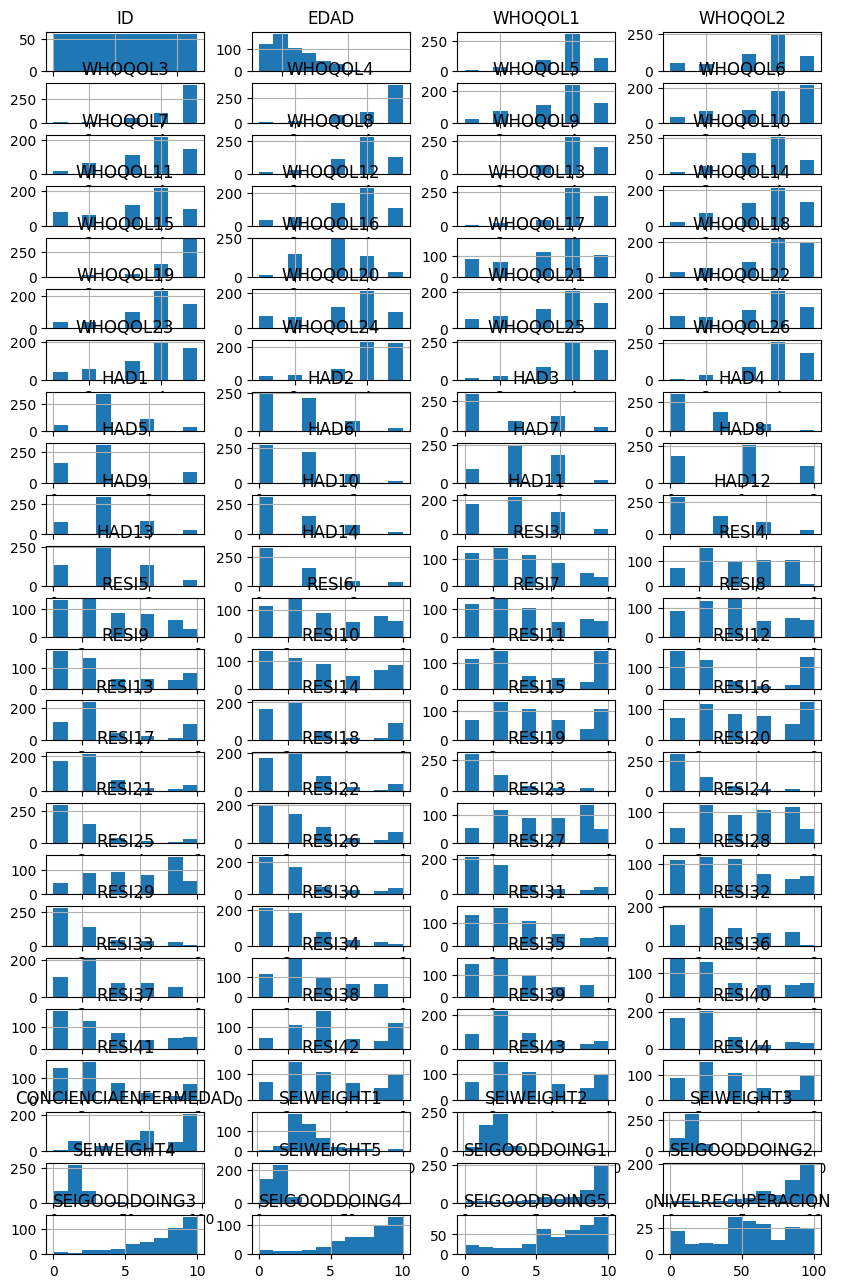

In [41]:
df.hist(layout=(120, 4), figsize=(10,80));

## Correlations

In [ ]:
df = pd.read_csv('/content/MyDrive/MyDrive/MUCSI/TFM/datos/TCA_T1.csv')

In [42]:
# Compute correlation matrix
corr_matrix = df.corr()

# Find columns and indices where correlation coefficient is 1 or -1
corr_coeff_1_or_minus_1 = corr_matrix
correlation_pairs = []

# Iterate over the rows of the correlation matrix
for row in corr_coeff_1_or_minus_1.iterrows():
    col = row[0]
    corr_coeff = row[1].dropna()
    for index, value in corr_coeff.items():
        correlation_pairs.append((col, index, value))

# Display the correlated column pairs with correlation coefficient of 1 or -1
for pair in correlation_pairs:
    col1, col2, corr_coeff = pair
    if (corr_coeff > 0.9 or corr_coeff < -0.9) and col1 != col2:
      print("Column '{}' has correlation coefficient {} with column '{}'".format(col1, corr_coeff, col2))


Column 'RESI32' has correlation coefficient 0.9360965487038275 with column 'RESI33'
Column 'RESI33' has correlation coefficient 0.9360965487038275 with column 'RESI32'


<ipython-input-42-83a90b843229>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<ipython-input-43-f382da1d0c03>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df[columns].corr()


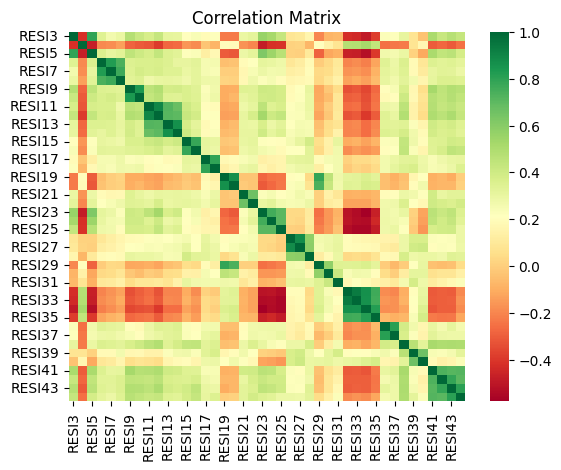

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = list(filter(lambda col: re.search('^RESI', col), df.columns))
correlation = df[columns].corr()

# Create a heatmap with Seaborn
sns.heatmap(correlation, cmap="RdYlGn")

# Show the plot
plt.title("Correlation Matrix")
plt.show()

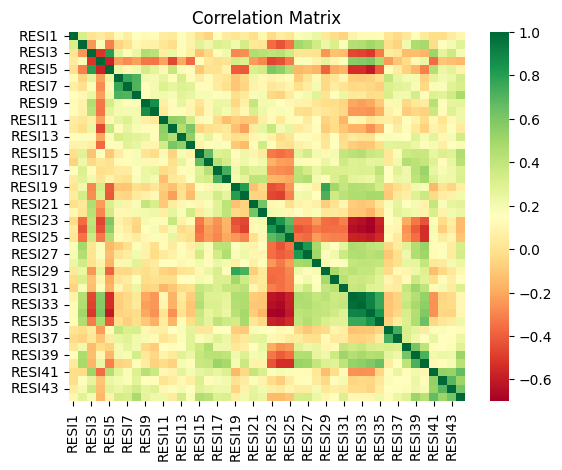

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = list(filter(lambda col: re.search('^(?!.*_(T2|T3)$)', col), df.columns))
correlation = df[columns].corr()

# Create a heatmap with Seaborn
sns.heatmap(correlation, cmap="RdYlGn")

# Show the plot
plt.title("Correlation Matrix")
plt.show()

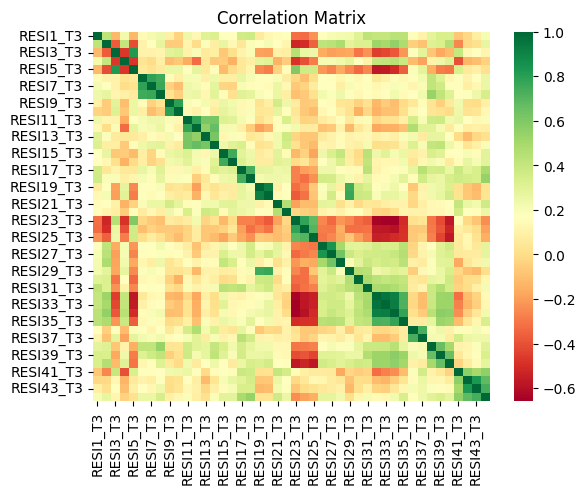

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = list(filter(lambda col: re.search('_T2', col), df.columns))
correlation = df[columns].corr()

# Create a heatmap with Seaborn
sns.heatmap(correlation, cmap="RdYlGn")

# Show the plot
plt.title("Correlation Matrix")
plt.show()

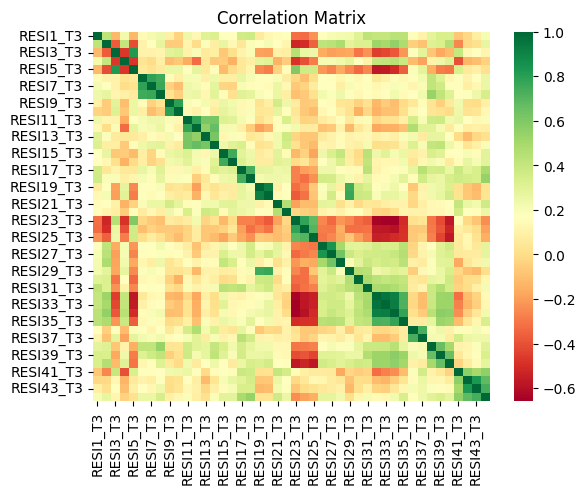

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = list(filter(lambda col: re.search('_T3', col), df.columns))
correlation = df[columns].corr()

# Create a heatmap with Seaborn
sns.heatmap(correlation, cmap="RdYlGn")

# Show the plot
plt.title("Correlation Matrix")
plt.show()